In [26]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Evaluar linealidad de las relaciones entre las variables
# -----------------------------------------------------------------------
from scipy.stats import shapiro, kstest
from itertools import combinations

In [27]:
df = pd.read_excel('airbnb.xlsx')

In [28]:
def explorar_dataset(df): # Función para una visión general del dataset

    print("Tamaño del dataset:")# Tamaño del dataset (filas y columnas)
    print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}") # Tamaño del dataset (filas y columnas)
    print("\nPrimeras 5 filas:") # Visualización primeras 5 filas
    display(df.head()) 
    print("\nTipos de datos:") # Tipos de datos por columna
    display(df.dtypes)
    print("\nValores_nulos:") 
    display(df.isnull().sum())

# Llamamos a la función para ver los datos
explorar_dataset(df)

Tamaño del dataset:
Filas: 30478, Columnas: 13

Primeras 5 filas:


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaT,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaT,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaT,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,2008-06-26,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,2008-06-26,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0



Tipos de datos:


Host Id                                int64
Host Since                    datetime64[ns]
Name                                  object
Neighbourhood                         object
Property Type                         object
Review Scores Rating (bin)           float64
Room Type                             object
Zipcode                              float64
Beds                                 float64
Number of Records                      int64
Number Of Reviews                      int64
Price                                  int64
Review Scores Rating                 float64
dtype: object


Valores_nulos:


Host Id                          0
Host Since                       3
Name                             0
Neighbourhood                    0
Property Type                    3
Review Scores Rating (bin)    8323
Room Type                        0
Zipcode                        134
Beds                            85
Number of Records                0
Number Of Reviews                0
Price                            0
Review Scores Rating          8323
dtype: int64

Las columnas Review Scores Rating (bin) y Review Scores Rating tienen el mismo num de registros nulos. 
Vamos a ver que porcentaje es y como tratarlo a continuación:

In [29]:
nulos = df.isnull().sum()/df.shape[0]*100
nulos

Host Id                        0.000000
Host Since                     0.009843
Name                           0.000000
Neighbourhood                  0.000000
Property Type                  0.009843
Review Scores Rating (bin)    27.308222
Room Type                      0.000000
Zipcode                        0.439661
Beds                           0.278890
Number of Records              0.000000
Number Of Reviews              0.000000
Price                          0.000000
Review Scores Rating          27.308222
dtype: float64

El porcentaje es de casi el 30%, es una gran cantidad de nulos, así que vamos a ver que podemos hacer con ellos.

In [30]:
df[['Review Scores Rating (bin)', 'Review Scores Rating']].sample(20)

,Review Scores Rating (bin),Review Scores Rating
6917,60.0,60.0
26470,70.0,71.0
5317,85.0,85.0
19809,NaN,NaN
21046,85.0,85.0
22636,85.0,87.0
16582,NaN,NaN
23161,NaN,NaN
18149,NaN,NaN
4278,100.0,100.0


Vemos que los nulos en las dos columnas coinciden, la columna Review Scores Rating (bin) probablemente ha sido convertida en bins (intervalos) para agrupar las "Reviews" (puntuaciones) en rangos específicos. 

Por ejemplo, en vez de tener las puntuaciones exactas, las agrupa por categorías. 

Decidimos eliminar la columna Review Scores Rating y quedarnos con la columna Review Scores Rating (bin) porque nos vendría mejor para las visulizaciones.

In [31]:
print(df.columns)

Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object')


In [32]:
df.columns = df.columns.str.strip()  # Elimina espacios extra al principio y al final de los nombres


In [33]:
if 'Review Scores Rating' in df.columns:
    df = df.drop(['Review Scores Rating'], axis=1)
else:
    print("La columna 'Review Scores Rating' no existe en el DataFrame.")


In [34]:
df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price
0,5162530,NaT,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145
1,33134899,NaT,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37
2,39608626,NaT,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28
3,500,2008-06-26,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199
4,500,2008-06-26,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549


Ahora que hemos eliminado la columna "duplicada", vamos a tratar los nulos de la columna Review.
 
Podemos imputar los nulos con 'Unknown':

In [35]:
df['Review Scores Rating (bin)'] = df['Review Scores Rating (bin)'].fillna(0)

df.sample(10)

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price
6470,2134501,2012-04-13,Traveler's Retreat in New York City,Queens,Apartment,90.0,Private room,11102.0,1.0,1,16,60
1806,314562,2010-12-09,East village one bedroom apartment,Manhattan,Apartment,85.0,Entire home/apt,10009.0,2.0,1,39,130
20690,17153037,2014-06-23,Sunny Bushwick Brownstone,Brooklyn,Apartment,90.0,Entire home/apt,11221.0,2.0,1,13,145
934,146052,2010-06-16,Upper East Side 1 bedroom apartment,Manhattan,Apartment,90.0,Entire home/apt,10021.0,1.0,1,8,220
6821,2289652,2012-05-04,"UWS, near Central Park, subway",Manhattan,Apartment,85.0,Shared room,10025.0,1.0,1,31,67
164,19852,2009-06-02,Lg Beautiful Garden Apt Sleeps 2,Manhattan,Apartment,95.0,Entire home/apt,10035.0,1.0,1,8,165
9779,3985537,2012-10-26,MUST SEE Nothing like it! Up'r East,Manhattan,Apartment,95.0,Private room,10128.0,1.0,1,104,99
14003,7141246,2013-06-27,PremierHome/Patio TimesSquare 8mins,Manhattan,Apartment,80.0,Entire home/apt,10016.0,4.0,1,5,475
25685,26415767,2015-01-20,Metro - Great Roof Deck Sleep 6,Brooklyn,Apartment,0.0,Entire home/apt,11215.0,3.0,1,0,250
17843,11527677,2014-01-21,Beautiful Privet Room + Back Yard,Brooklyn,Apartment,100.0,Private room,11237.0,1.0,1,5,65


In [36]:
df.dtypes

Host Id                                int64
Host Since                    datetime64[ns]
Name                                  object
Neighbourhood                         object
Property Type                         object
Review Scores Rating (bin)           float64
Room Type                             object
Zipcode                              float64
Beds                                 float64
Number of Records                      int64
Number Of Reviews                      int64
Price                                  int64
dtype: object

Ahora queda para ver que hacer con los valores nulos de la columna Zipcode, Beds, Host Since y Property Type.

- Zipcode es un tipo Float, tiene un bajo porcentaje de nulos (0.439661 %) y es un valor que podemos imputar porque podemos llegar a saber cual es el codigo postal de una cierta ciudad, es decir, tiene una relación simple con la variable Neighbourhood.
Lo imputaremos con el KNN.

- Beds es float también, es un porcentaje muy bajo de nulos (0.278890 %), podemos ver si hay una distribución simetrica y en base a eso imputarlo con la media o con la mediana.

- Host Since es un tipo fecha, es la fecha de inscripcion en la plataforma de Airbnb de ese host. 
Dadoque el porcentaje de nulos en esta columna es muy bajo (0.009843 %), decidimos imputar los nulos con la MODA.

- Property Type es el tipo de propiedad, es un valor categorico, como es un porcentaje bajo de nulos (0.009843 %) lo imputaremos con la MODA.

In [37]:
# Ver valores unicos en la columna Neighbourhood:

df['Neighbourhood'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Bronx', 'Staten Island'],
      dtype=object)

In [38]:
# CODIFICANDO COLUMNA NEIGHBOURHOOD:

# Convertir 'Zipcode' a numérico
df['Zipcode'] = pd.to_numeric(df['Zipcode'], errors='coerce')

# Configuramos el imputador KNN para imputar tanto 'Neighbourhood' como 'Zipcode'
knn_imputer = KNNImputer(n_neighbors=5)

# Imputamos los valores nulos de 'Zipcode'
df[['Zipcode']] = knn_imputer.fit_transform(df[['Zipcode']])

# Verificar que los nulos hayan sido imputados
print(df['Zipcode'].isna().sum())

# Verificar que la columna 'Neighbourhood' no haya sido modificada
print(df['Neighbourhood'].unique())


0
['Brooklyn' 'Manhattan' 'Queens' 'Bronx' 'Staten Island']


In [39]:
# Verificar si quedan nulos en 'Zipcode'
print(df['Zipcode'].isna().sum())


0


In [40]:
df.sample(10)

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price
3224,789975,2011-07-07,Bright Room in East Williamsburg,Brooklyn,Apartment,0.0,Private room,11207.0,1.0,1,0,70
6458,2125029,2012-04-12,luxury private suite by UN,Manhattan,Apartment,100.0,Private room,10016.0,2.0,1,1,200
28371,35500843,2015-06-10,Super Size Little Italy (sleeps 4),Manhattan,Apartment,0.0,Private room,10013.0,2.0,1,0,200
21217,17984987,2014-07-11,Spacious and Sunny Apartment,Brooklyn,Apartment,100.0,Shared room,11222.0,1.0,1,2,68
5581,1699273,2012-02-04,TIMES SQUARE! 5TH AVE! GREAT SPOT!!,Manhattan,Apartment,95.0,Entire home/apt,10017.0,3.0,1,23,235
12735,6059610,2013-04-23,Light-filled Brownstone Apartment,Brooklyn,Apartment,0.0,Entire home/apt,11201.0,1.0,1,0,199
26788,30343837,2015-03-31,"Quiet, Clean, Private Room with A/C",Manhattan,Apartment,95.0,Private room,10040.0,1.0,1,5,60
21738,19109608,2014-07-29,Charming 1BD- 10 min to Manhattan,Queens,Apartment,90.0,Entire home/apt,11106.0,3.0,1,16,124
10943,4523545,2012-12-29,Beauty! UWS on park + express stop,Manhattan,Apartment,0.0,Entire home/apt,10025.0,2.0,1,0,200
4730,1413098,2011-11-16,One stop from Midtown Manhattan!,Queens,Apartment,95.0,Private room,11101.0,1.0,1,114,95


Imputamos ahora los nulos de la columna Beds.

Vamos a ver como es la distribución con un histograma:

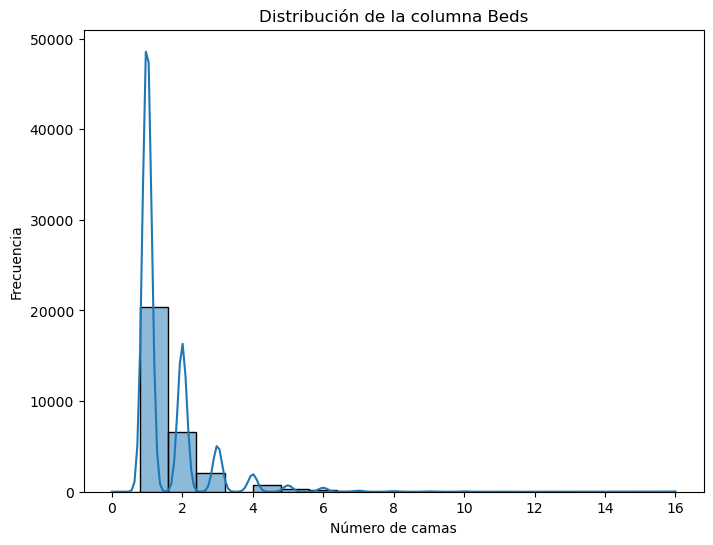

In [41]:
# Histograma de la columna 'Beds':

plt.figure(figsize=(8, 6))
sns.histplot(df['Beds'], kde=True, bins=20)
plt.title('Distribución de la columna Beds')
plt.xlabel('Número de camas')
plt.ylabel('Frecuencia')
plt.show()


Podemos ver que la distribución es sesgada hacia la derecha (distribución positivamente sesgada).

En este caso será mejor imputar los nulos con la mediana.

In [42]:
# Imputar los valores nulos con la mediana, sin usar inplace
df['Beds'] = df['Beds'].fillna(df['Beds'].median())

# Verificar que los nulos se han imputado
print(df['Beds'].isna().sum())


0


Vamos a tratar ahora los nulos de la columna Host Since.

Los imputamos con la moda:

In [43]:
# Obtener la moda de la columna 'Host Since' (la fecha más frecuente)
moda_host_since = df['Host Since'].mode()[0]

# Mostrar la moda (la fecha más frecuente)
print(f'Moda de "Host Since": {moda_host_since}')


Moda de "Host Since": 2014-02-10 00:00:00


In [44]:
# Imputar los valores nulos con la moda
df['Host Since'] = df['Host Since'].fillna(moda_host_since)

# Verificar que los nulos se han imputado
print(df['Host Since'].isna().sum())


0


Vamos a hacer lo mismo con Property Type.

Es un valor categorico, vamos a imputarlo siempre con la moda.

In [45]:
# Obtener la moda de la columna 'Property Type' (la tipología de alojamiento más frecuente):
moda_property_type = df['Property Type'].mode()[0]

# Mostrar la moda (la fecha más frecuente)
print(f'Moda de "Property Type": {moda_property_type}')


Moda de "Property Type": Apartment


In [46]:
# Imputar los valores nulos con la moda
df['Property Type'] = df['Property Type'].fillna(moda_property_type)

# Verificar que los nulos se han imputado
print(df['Property Type'].isna().sum())

0


In [47]:
# Verificar la cantidad de valores nulos por columna
valores_nulos_encoded = df.isna().sum()

# Mostrar los valores nulos por columna
print(valores_nulos_encoded)


Host Id                       0
Host Since                    0
Name                          0
Neighbourhood                 0
Property Type                 0
Review Scores Rating (bin)    0
Room Type                     0
Zipcode                       0
Beds                          0
Number of Records             0
Number Of Reviews             0
Price                         0
dtype: int64


In [48]:
# Verificar que la columna 'Neighbourhood' no haya sido modificada
print(df['Neighbourhood'].unique())

['Brooklyn' 'Manhattan' 'Queens' 'Bronx' 'Staten Island']


In [49]:
# Conteo de los valores únicos en la columna 'Neighbourhood'
conteo_barrio = df['Neighbourhood'].value_counts()

# Imprimir el conteo
print(conteo_barrio)

Neighbourhood
Manhattan        16033
Brooklyn         11675
Queens            2278
Bronx              345
Staten Island      147
Name: count, dtype: int64


Vamos a guardar el nuevo df en el archivo csv:

In [50]:
# GUARDAR EL DATAFRAME EN CSV
df.to_csv("airbnb_NY.csv", index=False)